In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
medium_policies = {
10 : np.array([np.array([-266.646 ,    1.5967]), np.array([-253.671 ,    1.3363]), np.array([-98.177 ,  20.1075])]),
0 : np.array([np.array([-395.3,    0. ]), np.array([-499.836,    0.   ]), np.array([-43.622,   0.   ])]),
    2.8 : np.array([np.array([-260.855 ,    1.2341]), np.array([-215.07 ,    2.401]), np.array([-100.783 ,   18.0866])])
}

large_policies = {
    0: np.array([np.array([-498.878,    0.   ]), np.array([-499.508,    0.   ]), np.array([-92.815,  -0.528]), np.array([-498.548,    0.   ]), np.array([-125.333,   -0.28 ])]),
    10: np.array([np.array([-319.853 ,    0.4676]), np.array([-335.383,    0.   ]), np.array([-137.984,   20.916]), np.array([-265.341,    0.   ]), np.array([-164.649 ,   15.3349])]), # ethical_large_we10_try2/2500_80000_1_(10)
    2.6: np.array([np.array([-294.134 ,    0.5257]), np.array([-323.513,    0.   ]), np.array([-124.557 ,   20.9307]), np.array([-261.979,    0.   ]), np.array([-138.025 ,   15.9467])])
}
print(large_policies[10].mean(axis=0))
print(large_policies[2.6].mean(axis=0))
print(medium_policies[10].mean(axis=0))
print(medium_policies[2.8].mean(axis=0))
print(np.array2string(large_policies[2.6].round(2).reshape((1,10)), separator=' & ', formatter={'float_kind':lambda x: "$%.2f$" % x}))

[-244.642     7.3437]
[-228.4416     7.48062]
[-206.16466667    7.68016667]
[-192.236         7.24056667]
[[$-294.13$ & $0.53$ & $-323.51$ & $0.00$ & $-124.56$ & $20.93$ &
  $-261.98$ & $0.00$ & $-138.02$ & $15.95$]]


In [3]:
# Function to get the intersection of two lines represented as f(we) = (1-we)*v0 + we*ve for a two given fixed sets of (v0, ve)
def get_intersection(v01, ve1, v02, ve2):
    if ve1 == ve2:
        return 0
    we = (v01 - v02) / (ve2 - ve1)
    return we
# get_intersection(mo_value_w10[2][0], mo_value_w10[2][1], mo_value_w0[2][0], mo_value_w0[2][1])

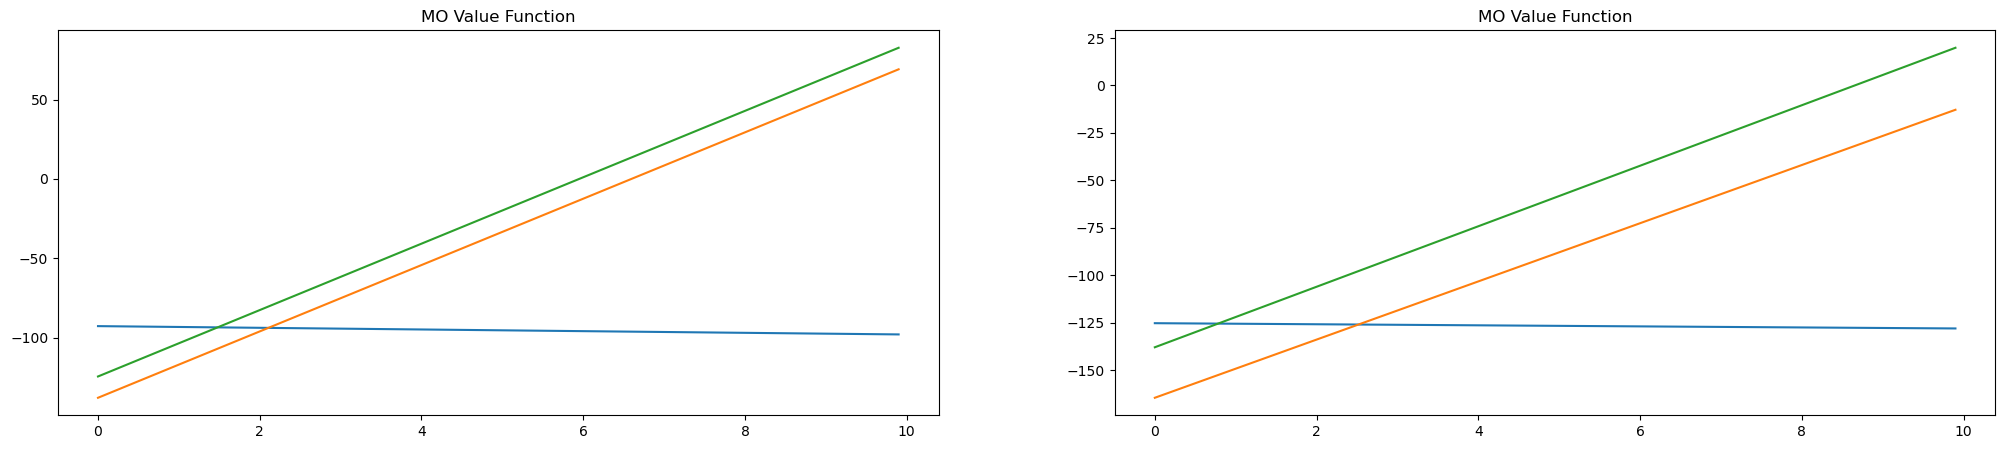

In [8]:
# Plot values as function of weight w that scales the reward
policies = large_policies
to_plot = [2, 4]
fig, axs = plt.subplots(1, len(to_plot), figsize=(25, 5))
step = 0.1
# for ag in mo_value_w10:
max_weight = 10
# Subplot for each agent
x = np.arange(0, max_weight, step)
w = np.array([np.ones(int(max_weight/step)), np.arange(0, max_weight, step)])


for i, ag in enumerate(to_plot):
    axs[i].set_title("MO Value Function")
    for p in policies.values():
        y = np.dot(p[ag], w)
        axs[i].plot(x, y)

plt.show()

In [5]:
def get_next_corner():
    wes = []
    p1 = policies[sorted(list(policies.keys()), reverse=True)[0]]
    p2 = policies[sorted(list(policies.keys()), reverse=True)[1]]
    for ag in range(policies[0].shape[0]):
        wes.append(get_intersection(p1[ag][0], p1[ag][1], p2[ag][0], p2[ag][1]))
    print(wes)
    return max(wes)
get_next_corner()

[-382.8592814371257, 0, 2.106370080208917, 0, 2.517851539234962]


2.517851539234962

In [6]:
ag = 2
p1 = policies[10]
p2 = policies[0]
get_intersection(p1[ag][0], p1[ag][1], p2[ag][0], p2[ag][1])

2.106370080208917

In [ ]:

# Plot values as function of weight w that scales the reward
policies = large_policies

fig, axs = plt.subplots(1, policies[0].shape[0], figsize=(25, 5))
step = 0.1
# for ag in mo_value_w10:
max_weight = 10
# Subplot for each agent
x = np.arange(0, max_weight, step)
w = np.array([np.ones(int(max_weight / step)), np.arange(0, max_weight, step)])
to_plot = [2, 4]
for i, ag in enumerate(to_plot):
    axs[ag].set_title("Weight Space for Agent i")
    # Set axis labels
    axs[ag].set_xlabel("Ethical Weight")
    axs[ag].set_ylabel("Value")
    # Plot the value function for each agent
    y = np.dot(policies[0][ag], w)
    axs[ag].plot(x, y, label=r"$\pi^i$")
    y = np.dot(policies[10][ag], w)
    axs[ag].plot(x, y, label=r"$\pi^i_r$")
    # Legend with size
    axs[ag].legend(loc="upper left", fontsize='xx-large')

    wep = get_intersection(policies[0][ag][0], policies[0][ag][1], policies[10][ag][0], policies[10][ag][1])
    print(wep)
    if 0 < wep < 10:
        # get y of f(we)
        print(policies[10][ag])
        y = np.dot(policies[10][ag], np.array([1, wep]).T)
        print(y)
        axs[ag].plot(wep, y, 'ro')
        # Draw vertical line until y
        axs[ag].plot([wep, wep], [-100, y], '--', color='black')

        # Existing ticks
        current_ticks = list(plt.xticks()[0])

        # Add a specific float value tick
        float_value = wep
        if float_value not in current_ticks:
            current_ticks.append(float_value)
            current_ticks.sort()  # Ensure ticks are in order

        # Define labels for the new ticks, making sure to convert all to strings
        # Here you could customize the format of any specific tick
        labels = [str(int(tick)) if tick != float_value else f'{float_value:.2f}' for tick in current_ticks]

        # Apply new ticks and labels
        plt.xticks(current_ticks, labels)

plt.show()


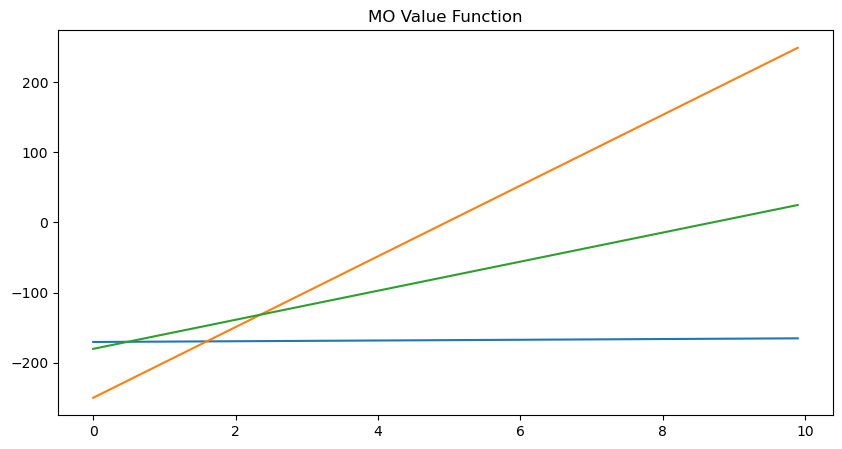

In [10]:
import numpy as np
import matplotlib.pyplot as plt

syntetic_data = {
    0: np.array([-170.557 ,   0.5257]),
    10: np.array([-250.134 ,    50.42]),
    5: np.array([-180.3455 ,   20.72])
}

plt.figure(figsize=(10, 5))
step = 0.1
# for ag in mo_value_w10:
max_weight = 10
# Subplot for each agent
x = np.arange(0, max_weight, step)
w = np.array([np.ones(int(max_weight/step)), np.arange(0, max_weight, step)])

plt.title("MO Value Function")
for p in syntetic_data.values():
    y = np.dot(p, w)
    plt.plot(x, y)

plt.show()
